<a href="https://colab.research.google.com/github/wwwh0225/elements-of-statistical-learning/blob/main/Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smoothing Splines


在過去的 splines 方法，我們都必須去決定 knots 的位置，但在此，我們討論一個自動建立 knots 的的模型，也就是使用 knots 的最大集合，而我們透過正則化(regularization)的方式來決定模型的複雜度。因為若我們不去限制模型的複雜度，我們一定可以配適到到一條通過每個點的函數，使 $RSS=0$ ，但這樣會導致模型過度配適 (overfitting) 的問題，因此，我們在此加入懲罰項，我們定義此模型的損失函數如下：

令 $f(x)$ 是二階連續可微，且定義**penalized residual sum of squares**為：

$$RSS(f,\lambda) = \sum_{i=1}^N\{ y_i - f(x_i) \}^2 + \lambda \int \{f''(t) \}^2 dt$$

其中， $\lambda$ 為**非負**的 tuning parameter 或稱 fixed smoothing parameter。 上式第一項衡量模型的配適程度，第二項針對模型曲率進行懲罰。我們可以考慮兩種極端的情形：

- $\lambda=0$ : $f$ 可以為任意經過每個資料點的函數。
- $\lambda = \infty$ : 因為 $\lambda = \infty$ ，故我們一定要要求二階微分為 $0$  ，故函數必須為線性，為簡單最小平方法所配適出來的直線。

我們可以證明， 當我們在極小化 $RSS(f,\lambda)$ 時，會有一個最小值，是擁有不重複的 (unique) $x_i,\ i=2,\cdots,N$ 的 knots 的 **natural cubic spline**。



---

### 證明 smoothing splines (from Ex. 5.7)

**Derivation of smoothing splines (Green and Silverman, 1994). Suppose that $N \geq 2$, and that $g$ is the natural cubic spline interpolant to the pairs $\{x_i, z_i\}_1^N$ , with $a < x_1 < \cdots < x_N < b$. This is a natural spline with a knot at every $x_i$; being an $N$-dimensional space of functions, we can determine the coefficients such that it interpolates the sequence $z_i$ exactly. Let $\tilde{g}$ be any other differentiable function on $[a, b]$ that interpolates the $N$ pairs.**

**(a) Let $h(x)=\tilde{g}(x)-g(x)$. Use integration by parts and the fact that g is a natural cubic spline to show that**

$$\int_{a}^{b}g''(x)h''(x)dx = -\sum_{j=1}^{N-1}g'''(x_j^+)\{ h(x_{j+1})-h(x_{j}) \}=0$$

依照題意，我們在此使用分部積分法來推導上式關係：

$$\begin{aligned}
\int_{a}^{b}g''(x)h''(x)dx &= \underbrace{g''(x)h'(x)|^b_a}_{=0,\ g''(a)=g''(b)=0} -\int_a^b g'''(x)h'(x)dx \\
&= - \sum_{i=1}^{N-1}\int_{x_i}^{x_{i+1}}g'''(x)h'(x)dx \\
&= - \sum_{i=1}^{N-1} \underbrace{ [g'''(x)h(x)]|_{x_i}^{x_{i+1}} }_{=0,\ h(x_i)=\tilde{g}(x_i)-g(x_i)=0,\ \forall i} + \sum_{i=1}^{N-1} \underbrace{\int_{x_i}^{x_{i+1}}g^{(4)}(x)h(x)dx }_{=0,\ g(\cdot)\ is\ cubic }\\
&=0
\end{aligned}$$

我們可以看到，我們在此使用了 natural cubic spline 對邊界配適直線的設定 (二次微分為 $0$ )，得到 $g''(a)=g''(b)=0$ 。而後再執行一次分部積分，可以看到根據 $h(\cdot)$ 的定義，可得 $h(x_i) = \tilde{g}(x_i)-g(x_i)=0\ ,\forall i$ 且 $g^{(4)}(x)=0$ ，故得證。

**(b) Hence show that**

$$\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt\ ,$$

**and that equality can only hold if h is identically zero in  $[a, b]$ .**

我們可以展開不等號左方的積分如下：

$$\begin{aligned}
\int_{a}^{b}\tilde{g}''(t)^2dt &= \int_{a}^{b} (g''(t)+h''(t))^2dt \\
&=\int_{a}^{b} g''(t)^2 dt + \int_{a}^{b} h''(t)^2 dt + 2\underbrace{\int_{a}^{b} g''(t)h''(t)dt}_{=0,\ by\ (a)}\\
&= \int_{a}^{b} g''(t)^2 dt + \int_{a}^{b} h''(t)^2 dt
\end{aligned}$$

除非在  $[a,b],\ h''(t)=0$ 否則 $\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt$ 必定成立，換句話說，**「等號」**成立於 $h''(t)=0,\ \forall t\in [a,b]$ 時，此條件也等同於 $h(t)=0,\ \forall t\in [a,b]$ 。

**(c) Consider the penalized least squares problem**

$$\min_f[\sum_{i=1}^N(y-f(x_i))^2+\lambda \int_{a}^{b}f''(t)^2dt]$$

Use (b) to argue that the minimizer must be a cubic spline with knots at each of the $x_i$ .

我們令 $\tilde{g}(x)$ 是極小化目標函數的函數，且 $g(x)$ 為 natural cubic spline ，故在 knots 處有 $g(x_i)=\tilde{g}(x_i),\ i=1,\cdots,N$ 。故如在 **(b)** 得到的結果：

$$\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt \ \Rightarrow \lambda \int_{a}^{b}\tilde{g}''(t)^2dt \geq \lambda \int_{a}^{b} g''(t)^2dt,\ \lambda >0$$

但既然 $\tilde{g}(\cdot)$ 已經能極小化損失函數，但 ${g}(\cdot)$ 的積分取值還更小，故只有  $\tilde{g}(\cdot)$ 等價於 ${g}(\cdot)$ 也就是 natural cubic spline 。


---

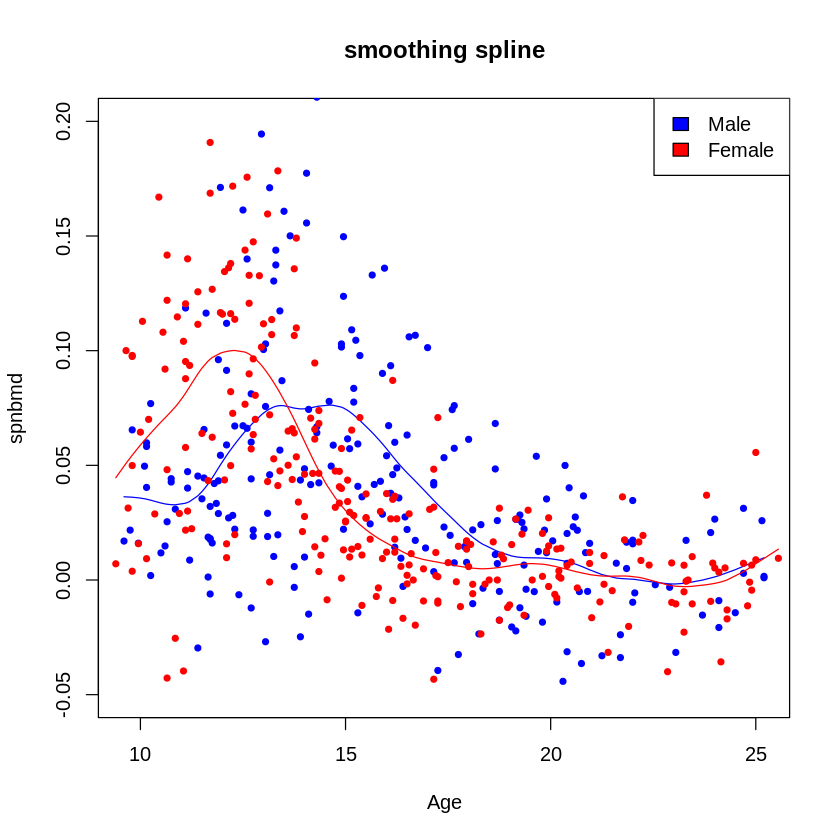

In [ ]:
#重制課本圖5.6

bone <- read.table('/bone.data',header = T)

males = bone$gender == "male" 
females = bone$gender == "female"

boneMaleSmooth = smooth.spline( bone[males,"age"], bone[males,"spnbmd"], df=12 )
boneFemaleSmooth = smooth.spline( bone[females,"age"], bone[females,"spnbmd"], df=12 )

plot(boneMaleSmooth, ylim=c(-0.05,0.20), col="blue", type="l", xlab="Age", ylab="spnbmd",main='smoothing spline')
points(bone[males,c(2,4)], col="blue", pch=20)

lines(boneFemaleSmooth, ylim=c(-0.05,0.20), col="red")
points(bone[females,c(2,4)], col="red", pch=20)
legend("topright",c('Male','Female'),fill =c('blue','red' ))

由於 smoothing spline 的解是 natural spline ，故我們可以將 $f(x)$ 寫成以下形式：

$$f(x)=\sum_{j=1}^N N_j(x)\theta_j$$

而我們說 $N_j(x)$ 是 $N$ 維的 basis functions，我們的損失函數寫成矩陣的形式即為：

$$RSS(\theta,\lambda) = (\mathbf{y}-\mathbf{N}\theta)^T(\mathbf{y}-\mathbf{N}\theta)+\lambda \theta^T \mathbf{\Omega_N}\theta$$

其中 $\{\mathbf{N} \}_{ij}=N_j(x_i)$ 且 $\{\mathbf{\Omega_N} \}_{jk} = \int N''_j(t)N''_k(t)dt$ 。

可以求出： $\hat{\theta} = (\mathbf{N}^T\mathbf{N}+\lambda\mathbf{\Omega_N})^{-1}\mathbf{N}^T\mathbf{y}$

這是 **generalized ridge regression** 的形式。